## Setup

In [13]:
%cd /notebooks/urban/urban

/notebooks/urban/urban


In [8]:
# imports
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

plt.style.use('fivethirtyeight')

In [14]:
# global
DATA_DIR = os.path.join(os.getcwd(), 'data')

COL_NAMES = ['character', 'browsing_page_url', 'word_url', 'word', 'definition', 'sentence']

## Read Data

In [16]:
file_paths = []
for root, dirs, files in os.walk(DATA_DIR):
  for f in files:
    if f.endswith('.csv') and f.startswith('urban_data'):
      file_paths.append(os.path.join(root, f))    

In [17]:
df_urban = pd.concat([pd.read_csv(f, names=COL_NAMES) for f in file_paths])

In [18]:
df_urban.shape

(2281497, 6)

In [19]:
df_urban.reset_index(inplace=True, drop=True)

In [20]:
df_urban.head()

,character,browsing_page_url,word_url,word,definition,sentence
0,G,https://www.urbandictionary.com/browse.php?cha...,https://www.urbandictionary.com/define.php?term=G,G,"G means mate in slang English , however u o...",1) What’s up G 2) yo G
1,G,https://www.urbandictionary.com/browse.php?cha...,https://www.urbandictionary.com/define.php?ter...,G & G,An alcoholic beverage that combines Gatorade a...,"Grab me another G & G, they are tasty ."
2,G,https://www.urbandictionary.com/browse.php?cha...,https://www.urbandictionary.com/define.php?ter...,G & P,ground & pound ; when a guy is on top of a...,Man i gave her the g & p last night !!!
3,G,https://www.urbandictionary.com/browse.php?cha...,https://www.urbandictionary.com/define.php?ter...,g (gamer),g is the word that people say when they are ...,Person1:g ( gamer )\r Person2:what did you do ...
4,G,https://www.urbandictionary.com/browse.php?cha...,https://www.urbandictionary.com/define.php?ter...,G - Word,G*mer,Journalists: G* mers are ruining society and ...


In [21]:
df_urban['character'].unique()

array(['G', 'S', 'M', 'F', 'E', 'Q', 'J', 'C', 'B', 'T', 'O', 'U', 'R',
       'D', 'X', 'Z', 'N', 'A', 'Y', 'P', 'L', 'H', 'V', 'I', 'W', 'K'],
      dtype=object)

In [22]:
df_nulls = df_urban[(df_urban.isnull().any(axis=1)) | (df_urban.isna().any(axis=1))]

In [23]:
df_nulls.shape

(4963, 6)

Check random samples.

In [24]:
df_sample = df_urban[['word', 'definition', 'sentence']].sample(10)

for i in df_sample.values:
  i[1] = re.sub('\r', ' ', i[1])
  i[2] = re.sub('\r', ' ', i[2])
  print("Word: ", i[0])
  print("Meaning: ", i[1])
  print("Sentence: ", i[2])
  print("---"*20)

Word:  Jared Robison
Meaning:  A person that is  truly   the bomb diggity  that deserves all the minidabs # yeet
Sentence:  Jared Robison is  literally   one of the most   talented  people I know.
------------------------------------------------------------
Word:  Oliver Masters
Meaning:  Big emo, His dad likes men and his moms a great teacher. WAKE ME UP  WAKE ME UP INSIDE  SAAAVE  MEEEE "Hey bro,  Nice cock "
Sentence:  "See that guy?  Hes  so  unfunny " "Yeah thats  oliver masters "
------------------------------------------------------------
Word:  BooHaa
Meaning:  The expression  BooHaa  originated within a diminutive town in  Derbyshire .  Its first usage can be traced back to a small clan of people known as the  Lampers .    Initially used by one of the clan’s legendary members, the term BooHaa has become a more increasingly accepted form of communication amongst  the Lamper  clan.    It is more typically used when Lampers communicate through online networks and messenger progra

## EDA

Very simple EDA.

- Number of words per character

- Length of words, meaning, sentence

- Number of characters in word, meaning, sentence

- Frequent special characters used

In [25]:
df_urban = df_urban.drop(df_nulls.index)

In [26]:
df_urban.shape

(2276534, 6)

In [27]:
def plot_hist(vals, bins, title, xlabel, ylabel):
  plt.figure(figsize=(12,8))
  sns.distplot(vals, kde=False, bins=bins)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

### By Word Analysis

In [28]:
df_urban['word_chars_num'] = df_urban['word'].apply(lambda x: len(x))
df_urban['word_words_num'] = df_urban['word'].apply(lambda x: len(x.split()))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


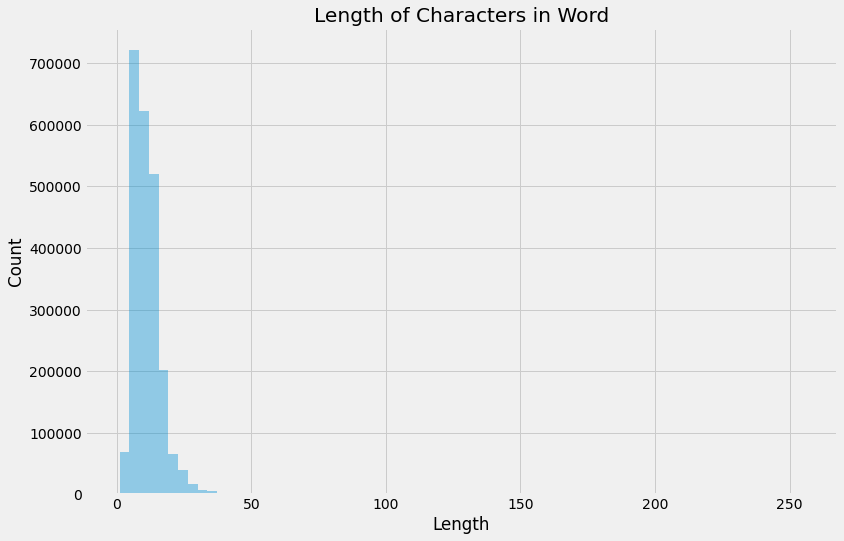

In [29]:
plot_hist(df_urban.word_chars_num, bins=70,
          title='Length of Characters in Word',
          xlabel='Length',
          ylabel='Count')

In [30]:
df_urban['word_chars_num'].quantile([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999])

0.100     6.0
0.300     8.0
0.500    10.0
0.600    11.0
0.700    13.0
0.800    14.0
0.900    17.0
0.950    20.0
0.990    29.0
0.999    52.0
Name: word_chars_num, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


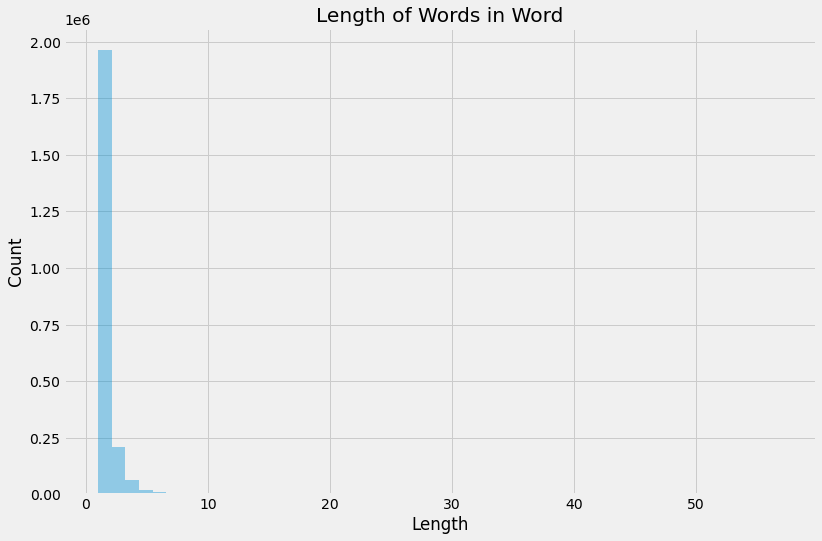

In [35]:
plot_hist(df_urban.word_words_num, bins=50,
          title='Length of Words in Word',
          xlabel='Length',
          ylabel='Count')

In [36]:
df_urban['word_words_num'].quantile([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999])

0.100    1.0
0.300    1.0
0.500    1.0
0.600    2.0
0.700    2.0
0.800    2.0
0.900    3.0
0.950    3.0
0.990    5.0
0.999    9.0
Name: word_words_num, dtype: float64

In [38]:
df_urban[df_urban.word_words_num > 3].sample(10)['word'].values

array(['hong kong piss bucket', 'Scanned her bar code',
       'Death toll rising rule', 'things that are not people',
       "Aunt Hony's special recipe", 'Cry Baby Ass Nigga',
       'koon midi pool nagiri', 'Darlington High School, S.C.',
       'post shit syndrom (pss)',
       "Vous avez menti ans sur mon nom, je vous fait. Je suis en amour avec l'homme que vous repesented pas qui vous a agi comme"],
      dtype=object)

Ignore *words* that have > 9 words.

### By Definition Analysis

In [39]:
df_urban['defn_chars_num'] = df_urban['definition'].apply(lambda x: len(x))
df_urban['defn_words_num'] = df_urban['definition'].apply(lambda x: len(x.split()))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


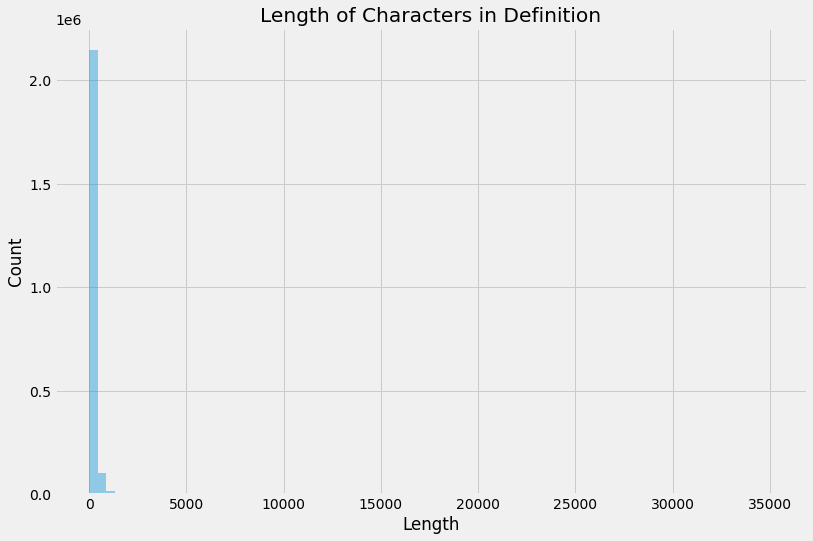

In [40]:
plot_hist(df_urban.defn_chars_num, bins=80,
          title='Length of Characters in Definition',
          xlabel='Length',
          ylabel='Count')

In [41]:
df_urban['defn_chars_num'].quantile([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999])

0.100      38.0
0.300      74.0
0.500     114.0
0.600     140.0
0.700     175.0
0.800     229.0
0.900     337.0
0.950     470.0
0.990     935.0
0.999    1643.0
Name: defn_chars_num, dtype: float64

In [58]:
df_urban[(df_urban.defn_chars_num >= 190) & (df_urban.defn_chars_num <= 191)]['definition'].sample(10).values

array(["The act of  being cool /bad. something you can't believe is  owff . If someone does something that could get them into trouble, it may be owff.  Owff  could be something done  out of spite .",
       'When a guy is laying on his back, spreading his legs, and holding his knees. A girl snorts a line of coke off his ass cheeks and hocks a  loogie  of cocaine filled  snot  into  his asshole .',
       'The section  of  a tool /device directly responsible for producing the desired effect of that tool/device. \r   Generally used in the context of a threat, occasionally in a sexual  scenario .',
       'its a small creature with 6 legs.  It lives in any  unwashed   vaginal area . Always be aware when you are with a bitch.....they might havea clit critter and it will  bit the dick  right off',
       'This is a northern Wisconsin expression which is used to describe any number of  stiff  drinks made with whiskey or  Brandy . Commonly used to describe a Manahatan or a Brandy  Old Fashio

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


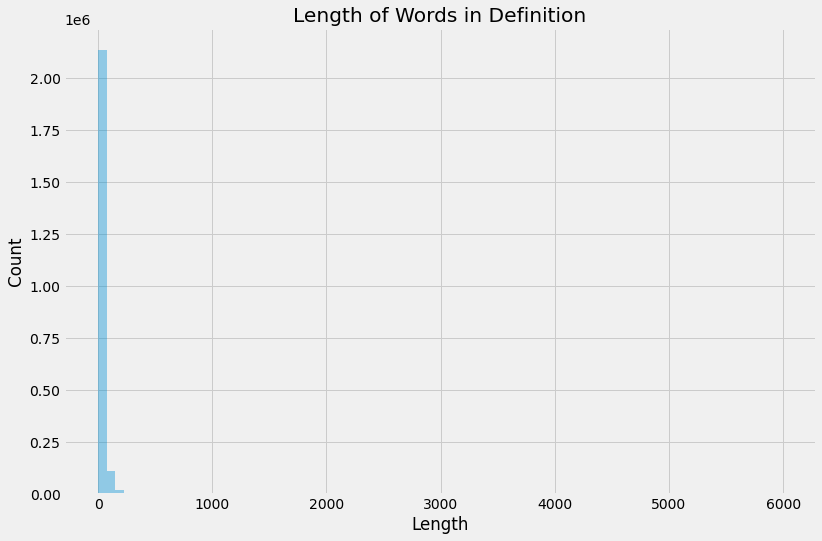

In [61]:
plot_hist(df_urban.defn_words_num, bins=80,
          title='Length of Words in Definition',
          xlabel='Length',
          ylabel='Count')

In [62]:
df_urban['defn_words_num'].quantile([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999])

0.100      7.0
0.300     13.0
0.500     20.0
0.600     25.0
0.700     31.0
0.800     41.0
0.900     60.0
0.950     83.0
0.990    164.0
0.999    291.0
Name: defn_words_num, dtype: float64

In [79]:
df_urban[(df_urban.defn_words_num > 35) & (df_urban.defn_words_num < 38)]['definition'].sample(10).values

array(["9.50am/ pm  is known as Cowboy Time, because if you say 'ten to ten' repeatedly, it sounds like a  galloping  horse - 'ten to  ten  to ten to ten to ten to ten to ten' etc.",
       'So Into You  by Atlanta Rhythm Section. That keyboard  riff  is one of the trippiest things I’ve ever heard in my life. I feel like I’m entering into a different  dimension  every time I listen to it.',
       'Stands for "I hate you so much right now". Usually used when you hate someone at the moment of speaking and you want to  inform  him/her. Comes from the song  Caught Out There  performed by  Kelis .',
       'Gotta\r Homeboy Rollin In reference to  gnr , but used by white people that are tired of using lol, but afraid of saying Gotta  Nigga Rollin  because it might offend somebody, and get their ass kicked',
       'another term for a camel toe. when the pants are worn so  high up  and tight that they get  wedged  between the  vagina lips . usually found on old woman, you really dont wanna s

Ignore defintions with word length > 38.

### By Sentence Analysis

In [80]:
df_urban['sent_chars_num'] = df_urban['sentence'].apply(lambda x: len(x))
df_urban['sent_words_num'] = df_urban['sentence'].apply(lambda x: len(x.split()))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


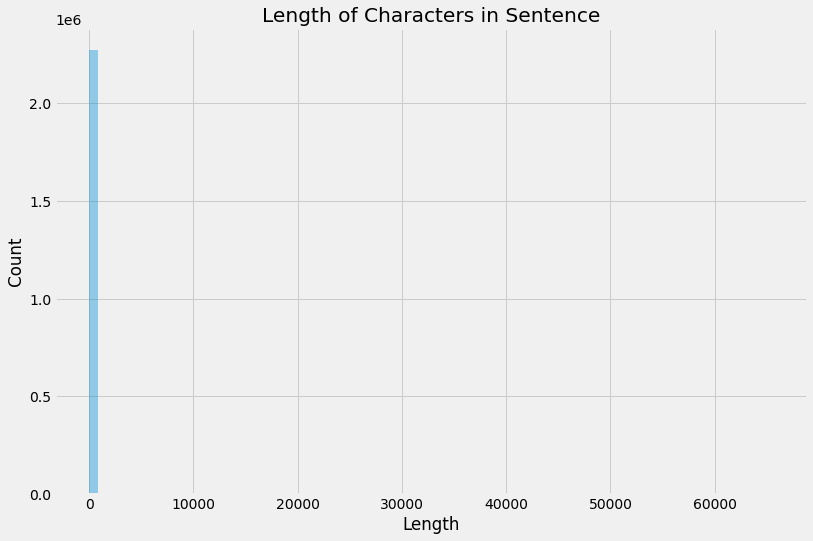

In [81]:
plot_hist(df_urban.sent_chars_num, bins=80,
          title='Length of Characters in Sentence',
          xlabel='Length',
          ylabel='Count')

In [82]:
df_urban['sent_chars_num'].quantile([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999])

0.100      34.000
0.300      57.000
0.500      81.000
0.600      96.000
0.700     114.000
0.800     142.000
0.900     195.000
0.950     257.000
0.990     465.000
0.999    1089.467
Name: sent_chars_num, dtype: float64

In [106]:
df_urban[df_urban.sent_chars_num > 155].shape

(376796, 12)

In [109]:
df_urban[(df_urban.sent_chars_num > 140) & (df_urban.sent_chars_num < 142)]['sentence'].sample(10).values

array(['"Look at that Italian, he can\'t have fun, lets  woonce  him"\r   " Woonce , woonce, woonce, woonce"\r   "We woonced him good  shake  of  fist "',
       "1.Man's drank too much  heny  last night and got hella  geazed 2.Went to the gym and got geazed 3.No need to get so geazed,  it's just a game",
       "Let's hit the bar tonight braaaahh.  Sorry dude . I'm  handing  out at home. Rachel wants to visit with  stiff Richard  and imma hit it good.",
       'Foppa Crew  #77 Pat\r Foppa Crew #98 JT\r Foppa Crew #87  Stinger   Foppa Crew # 7 Jack\r Foppa Crew #31  Allgood   Foppa Crew # 9 Wiz\r   ETC...',
       'Sean: wtf happened last night, i was so drunk i think i banged a man\r Frank:  SHING DOW   Sean: Really dude!  I knew it . Thanks  allot  man.',
       'Susan and  Brendon  both had  furniture  orgasms when they saw the new furniture and  fabric  that was going to be put on the showroom floor.',
       'When i go to the  massage parlor , i always ask  the nice  Korean lady t

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


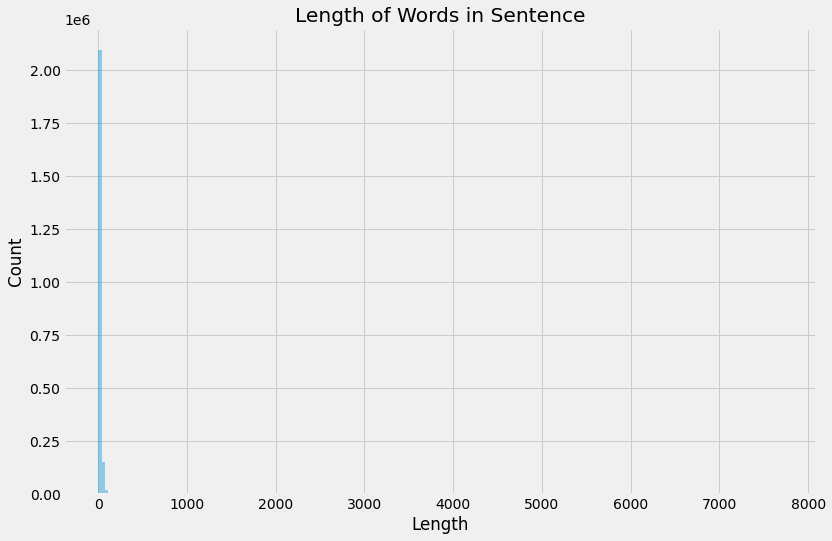

In [110]:
plot_hist(df_urban.sent_words_num, bins=200,
          title='Length of Words in Sentence',
          xlabel='Length',
          ylabel='Count')

In [111]:
df_urban['sent_words_num'].quantile([0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999])

0.100      6.0
0.300     11.0
0.500     15.0
0.600     18.0
0.700     21.0
0.800     26.0
0.900     36.0
0.950     47.0
0.990     84.0
0.999    193.0
Name: sent_words_num, dtype: float64

In [120]:
df_urban[df_urban['sent_words_num'] > 25].shape

(488271, 12)

In [122]:
df_urban[(df_urban.sent_words_num > 22) & (df_urban.sent_words_num < 25)]['sentence'].sample(10).values

array(['girl- "why did u drop my phone?"\r boy- "bitch,  who u  talkin to  like dat ?"\r girl- "mother fucker,  DONT DO ME !"',
       "Man I just  got off  a 12 hour  shift  and I'm off for the weekend, I'm about to go  sip  me a panglasso.",
       '"Wow, she\'s  so pretty ! and really sweet! Must be a Kaycie"\r "Be  careful  though, I heard she can easily  ruin  your life"',
       '"Dan  get in the truck . Lets go down to the  snake pit  and find a bitch to fuck  the gay  out of you."',
       '“The guy I  hooked up  with had a pretty hole, we had a  great time .” “ Damn you  have such a pretty hole”',
       'That guy  walks  like he has been  Key  Wested.\r That girl walks like she has been doing a lot of Key  Westing .',
       "Person 1: Man, I can't get  Recon  in  Halo !\r Person 2: Well, I have  Recon Armor . Also, I have this cake.",
       '"Last night I was looking through a  yearbook ... Taking  a trip  down  memory lane  or as I like to call it... fucker alley!.."',
   

### Most Frequent Words used in Words, Meaning and Sentence

In [ ]:
for cat in sorted(df_urban['character'].value_counts().index):

  text = ' '.join(df_urban[df_urban['character'] == cat]['word'].values)

  wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(text)

  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f'WordCloud for character {cat}', fontsize=26)

Output hidden; open in https://colab.research.google.com to view.

## Cleaning To-Do's

Cleaning data based off the EDA.

- Remove any row with nulls or nans. ✅ 

- Replace \r with single white space in a string. ✅ 

- Remove trailing white spaces at the end. ✅ 

- Remove word / meaning / sentence that are empty strings. (None of them have empty strings) ✅ 

- Replace all spaces that exist before a period symbol or punctuation at the end. ✅ 

- Replace double or more spaces with single space. ✅ 

- Remove emojis. ✅ 

- Apply transformations based off EDA. ✅ 

In [ ]:
df_sample = df_urban[['word', 'definition', 'sentence']].sample(10)

for i in df_sample.values:
  i[1] = re.sub('\r', ' ', i[1])
  i[2] = re.sub('\r', ' ', i[2])
  print("Word: ", i[0])
  print("Meaning: ", i[1])
  print("Sentence: ", i[2])
  print("---"*20)

In [125]:
import os
import re
import pandas as pd
from tqdm.auto import tqdm

# set globals
DATA_DIR = os.path.join(os.getcwd(), 'data')
COL_NAMES = ['character', 'browsing_page_url', 'word_url', 'word', 'definition', 'sentence']

def replace_special(string):
  """Replace special \r character from text."""
  new_str = re.sub('\r', ' ', string)
  return new_str

def replace_space_before_punct(string):
  """Remove all existing spaces before punctuation."""
  new_str = re.sub(r"\b\s+’\b", r"'", string)
  new_str = re.sub(r"\"\s\b", r'"', new_str)
  new_str = re.sub(r"\b\s+,\s*\b", r', ', new_str)
  new_str = re.sub(r'\s([?.!"](?:\s|$))', r'\1', new_str)
  return new_str

def replace_double_spaces(string):
  """Replace all more than one spaces to single space."""
  return ' '.join(string.split())

def remove_emoji(string):
  """Replace emojis from text
  Source: https://stackoverflow.com/a/49146722/330558"""

  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
    
  return emoji_pattern.sub(r'', string)

def eda_based_cleaning(df):
  """Filter data based off observations from EDA."""

  df['word_chars_num'] = df['word'].apply(lambda x: len(x))
  df['word_words_num'] = df['word'].apply(lambda x: len(x.split()))
  df['defn_chars_num'] = df['definition'].apply(lambda x: len(x))
  df['defn_words_num'] = df['definition'].apply(lambda x: len(x.split()))
  df['sent_chars_num'] = df['sentence'].apply(lambda x: len(x))
  df['sent_words_num'] = df['sentence'].apply(lambda x: len(x.split()))
  
  df = df[~((df.word_chars_num > 17) | (df.word_words_num > 3))]
  print("After filtering based on word length: ", df.shape[0])
  df = df[~((df.defn_chars_num > 190) | (df.defn_words_num > 38))]
  print("After filtering based on definition length: ", df.shape[0])
  df = df[~((df.sent_chars_num > 155) | (df.sent_words_num > 25))]
  print("After filtering based on sentence length: ", df.shape[0])

  print("New dataframe shape: ", df.shape)

  return df

def final_clean(text):
  """Main function to apply all cleaning functions."""
  cleaned_text = replace_special(text)
  cleaned_text = replace_space_before_punct(cleaned_text)
  cleaned_text = replace_double_spaces(cleaned_text)
  cleaned_text = remove_emoji(cleaned_text)

  return cleaned_text

if __name__ == "__main__":
  print("-"*50)
  print("Loading data...")
  file_paths = []
  for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
      if f.endswith('.csv') and f.startswith('urban_data'):
        file_paths.append(os.path.join(root, f))

  df_urban = pd.concat([pd.read_csv(f, names=COL_NAMES) for f in file_paths])
  print("Data loaded.")
  print("Data shape: ", df_urban.shape)
  df_urban.reset_index(inplace=True)
  print("-"*50)

  df_nulls = df_urban[(df_urban.isnull().any(axis=1)) | (df_urban.isna().any(axis=1))]
  print("Records with at least one column null: ", df_nulls.shape[0])
  print("Dropping nulls.")
  df_urban = df_urban.drop(df_nulls.index)
  df_urban.reset_index(inplace=True)
  print("New data shape: ", df_urban.shape)
  print("-"*50)

  print("Applying transformation based off EDA.")
  df_urban_new = eda_based_cleaning(df_urban)
  print("-"*50)

  print("Cleaning texts...")
  df_urban_new['word'] = df_urban_new['word'].apply(lambda x: final_clean(x))
  df_urban_new['definition'] = df_urban_new['definition'].apply(lambda x: final_clean(x))
  df_urban_new['sentence'] = df_urban_new['sentence'].apply(lambda x: final_clean(x))
  print("Data shape: ", df_urban_new.shape)
  print("-"*50)

  print("Success!")

--------------------------------------------------
Loading data...
Data loaded.
Data shape:  (2281497, 6)
--------------------------------------------------
Records with at least one column null:  4963
Dropping nulls.
New data shape:  (2276534, 8)
--------------------------------------------------
Applying transformation based off EDA.
After filtering based on word length:  2040610
After filtering based on definition length:  1510635
After filtering based on sentence length:  1287550
New dataframe shape:  (1287550, 14)
--------------------------------------------------
Cleaning texts...
Data shape:  (1287550, 14)
--------------------------------------------------
Success!


In [126]:
df_urban_new.dropna(inplace=True)

In [127]:
df_urban_new.shape

(1287550, 14)

### New pre-processed data samples

In [132]:
df_sample = df_urban_new[['word', 'definition', 'sentence']].sample(10)

for i in df_sample.values:
  i[1] = re.sub('\r', ' ', i[1])
  i[2] = re.sub('\r', ' ', i[2])
  print("Word: ", i[0])
  print("Meaning: ", i[1])
  print("Sentence: ", i[2])
  print("---"*20)

Word:  Woman's Cookie
Meaning:  Another word for a woman's vagina.
Sentence:  "She was keeping her woman's cookie away from her spouse ."
------------------------------------------------------------
Word:  Support Hose
Meaning:  Panty hose your grandma wears to keep her tummy tucked in. It's extra tight up there.
Sentence:  My grandma's support hose hung on the line.
------------------------------------------------------------
Word:  ho-house
Meaning:  A house where you can find prostitutes
Sentence:  Let's go to the ho-house and see if we can get some cheap whores.
------------------------------------------------------------
Word:  elodea
Meaning:  a plant that lives under water.
Sentence:  an elodea is a plant
------------------------------------------------------------
Word:  jahleek
Meaning:  two faced douchebag
Sentence:  Jahleek is a liar, jerk , & fake.
------------------------------------------------------------
Word:  rendonite
Meaning:  a shady, no good, pond scum male/female

In [133]:
df_urban_new = df_urban_new[['character', 'browsing_page_url', 'word_url', 'word', 'definition', 'sentence']]


df_urban_new.to_csv(os.path.join(DATA_DIR, 'final_cleaned_words.csv'),
                    index=False)

In [134]:
test = pd.read_csv(os.path.join(DATA_DIR, 'final_cleaned_words.csv'))

In [135]:
test.shape

(1287550, 6)

In [136]:
test.character.value_counts()

S    155936
B    103982
C     98612
D     97374
P     79609
T     78347
M     75357
F     67609
A     58870
G     55200
H     50407
R     45235
L     42320
W     40010
J     38707
K     35500
E     27488
I     24681
N     23768
O     22626
V     17250
Y     15766
U     12956
Z     10140
Q      6912
X      2888
Name: character, dtype: int64